<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.thoughtco.com/thmb/KEXYeuqtI767jt1XqkObGqM_Xtw=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/GettyImages-144635668-1d9932afb0cd44a2ad33b1f0329d6ec6.jpg" width="400px" height="300px" />

# PROYECTO MODULO 2 #

> Realizado por Andrea Camacho y Mariana Artemisa Diaz Meza

> Fecha: 30 de noviembre de 2022

> Profesor: Carlos Muro

> Materia: Simulacion matematica
---

## Objetivos del proyecto

### Objetivo general

Estudiar el circuto RLC completo en serie con una entrada del voltaje (E) constante.

### Objetivo especifico

Comprobar que lo que se produce en la salida son oscilaciones libres.

Utilizar la Ecuación Diferencial Lineal general del circuito.

 ---

## Modelo del problema

El circuito RLC en serie consiste de una resistencia (R), un inductor (L) y un condensador (C). Al inducir una corriente $E(t)$ dependiente del tiempo surge otra corriente que será una modificación de la corriente de entrada dependiendo de los tres parámetros $R$,$L$,$C$.

Así, por la Ley de Kirchhoff se tiene:

$$E(t)=L\frac{di}{dt}+Ri+\frac{q}{C}$$

Pero la carga $q(t)$ en el capacitor se relaciona con la corriente $i(t)$ con $i=\frac{dq}{dt}$. Así, la ecuación anterior quedaría como una ecuación diferencial lineal de segundo orden de la forma:

$$E(t)=L\frac{d^2q}{dt^2}+R\frac{dq}{dt}+\frac{q}{C}$$

---
**Circuito RLC completo con entrada constante**

[Descarga enlace para visualizar](https://iteso01-my.sharepoint.com/:i:/g/personal/nt726652_iteso_mxEbq2HjgOlHZDp4QfESMsUyIBofapT4Cp-2yCaXNGVooQwA?e=nHdQSS)

Condiciones del circuito:

* $E(t)=cte$

* $L=0.25 [H]$

* $R=10 [\Omega]$

* $C=0.001 [F]$

* $q(0)=10 [C]$

* $i(0)=0$


Sustituyendo las condiciones de R, L, C y E en la ecuación diferencial, se tiene:

$$\frac{1}{4}\ddot{q}+10\dot{q}+1000q=0$$

Multiplicando por 4 para dejar la doble derivada sin coeficiente:

$$\ddot{q}+40\dot{q}+4000q=0$$

Al resolver esta ecuación, se tendrá una solución simplificada de la forma:

$$Ae^{-\lambda t}\sin{(\sqrt{\omega^2-\lambda^2} t+\phi)}$$

Donde A es la magnitud $\sqrt{C_1^2+C_2^2}$ y ángulo de fase $\tan{\phi}=\frac{C_1}{C_2}$

Para encontrar el valor de las constantes se utilizarán las últimas dos condiciones, tomando en cuenta que $i(0)=\dot{q}(0)$

Al graficar el resultado se espera tener un circuito sobreamortiguado, críticamente amortiguado o subamortiguado.

## Solucion del problema


In [1]:
# Importar librerías
import numpy as np
from matplotlib import pyplot as plt
import sympy as sym

In [2]:
from ipywidgets import *

In [3]:
# Variables
sym.var('t',real=True)
Q = sym.Function('q')
Q(t)

q(t)

In [4]:
# Ecuación diferencial
eq = Q(t).diff(t,t)+40*Q(t).diff(t)+4000*Q(t)
eq

4000*q(t) + 40*Derivative(q(t), t) + Derivative(q(t), (t, 2))

In [5]:
# Solución a la ecuación diferencial
sol = sym.dsolve(eq,Q(t))
sol

Eq(q(t), (C1*sin(60*t) + C2*cos(60*t))*exp(-20*t))

In [6]:
# Valores de las constantes C_1 y C_2

#   Derivada de la carga; corriente
sym.var('C1',real=True)
sym.var('C2',real=True)
sym.diff(sym.exp(-20*t)*(C1*sym.sin(60*t)+C2*sym.cos(60*t)),t)

-20*(C1*sin(60*t) + C2*cos(60*t))*exp(-20*t) + (60*C1*cos(60*t) - 60*C2*sin(60*t))*exp(-20*t)

---
Conociendo la función de la corriente respecto al tiempo se puede encontrar las constantes $C_1$ y $C_2$:

* $q(0)=10[C]$:

$$q(0)=e^{-20(0)}(C_1\sin{(60(0))}+C_2\cos{(60(0))})=10$$

Despejando $C_1$ se tiene un valor de $10$.

* $i(0)=0$

$$i(0)=-20e^{-20(0)}(C_1\sin{(60(0))}+C_2\cos{60(0)})+60e^-{-20(0)}(C_1\cos{60(0)}-C_2\sin{60(0)})$$

Despejando $C_2$ se tiene un valor de $3C_1$ o lo que es lo mismo; $30$.

La solución sería entonces:

$$q(t)=e^{-20t}(10\sin{(60t)}+20\cos{(60t)})$$

o bien, de manera simplificada y como se vio al inicio, quedaría:

<font color=red> $$q(t)=10\sqrt{10}e^{-20t}\sin{60t+0.3218}$$ </font>

## Visualizacion del problema

In [7]:
def solut(t,C1,C2):
    return np.exp(-20*t)*(C1*np.sin(60*t)+C2*np.cos(60*t))

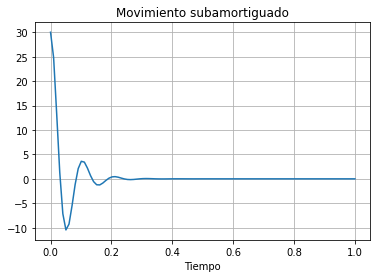

In [8]:
C1 = 10
C2 = 3*C1
t=np.linspace(0,1,100)
plt.plot(t,solut(t,C1,C2))
plt.xlabel('Tiempo')
plt.title('Movimiento subamortiguado')
plt.grid()

In [9]:
@interact(C1=(0.1,20,1),C2=(0.1,40,1.1))

def grafico(C1=10,C2=30):
    t=np.linspace(0,1,100)
    x=solut(t,C1,C2)

    plt.plot(t,x,label='Movimiento subamortiguado')
    plt.legend(loc='center left',bbox_to_anchor=(1.01,0.5))
    plt.axis([0,1,-20,35])
    plt.grid()

interactive(children=(FloatSlider(value=10.0, description='C1', max=20.0, min=0.1, step=1.0), FloatSlider(valu…

## Conclusiones


Con las condiciones iniciales, los valores de los componentes y la ecuación diferencia, se obtuvo que el comportamiento del circuito es subamortiguado, es decir, la corriente se ve como una onda senoidal que siminuye con el tiempo. Esto representa una resonancia de manera natural, sin una fuente impulsora.

## Referencias

[Ruiz, C. (2020). Aplicación: el circuito RLC. Departamento de Análisis Matemáticos. España: Universidad Complutense. ](https://blogs.mat.ucm.es/cruizb/wp-content/uploads/sites/48/2020/07/M-EDO2-RLC.pdf)